## Importing Required Libraries
We start by importing the necessary libraries including OpenCV, NumPy, and Matplotlib for image processing and visualization.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Optical Mark Recognition (OMR) System Utilities
This notebook contains utility functions for an Optical Mark Recognition (OMR) system. Each function is described in detail below
.

## Separate Rectangles from Image
  This function identifies and separates rectangles from an image based on contours. It filters out contours that have an area greater than a specified threshold and have four corners.



In [ ]:
def Separate_Rectangles_From_Image(contours):
    rectCon = []
    max_area = 50
    for i in contours:

        area = cv.contourArea(i)
        # print("Area : ", area)

        if area > max_area:

            # True means 'Closed Object'
            peri = cv.arcLength(i, True)
            # print("Perimeter : ", peri)

            # Determining the Polygon Type by checking its no of corners
            approx = cv.approxPolyDP(i, 0.02 * peri, True)
            # print("Sides of the Polygon : ", approx)

            # If it has four corner points, Add it in the rectCon list
            if len(approx) == 4:
                rectCon.append(i)
            # print("\n")

    # Sort the rectangles based on 'Area' in Descending Order
    rectCon = sorted(rectCon, key=cv.contourArea,reverse=True)
    # print(len(rectCon))

    return rectCon

## Reorder Points
    This function reorders the points of a rectangle to ensure a consistent order (top-left, top-right, bottom-right, bottom-left).


In [ ]:

def reorder(UnSorted_Points):

    UnSorted_Points = UnSorted_Points.reshape((4, 2))  # REMOVE EXTRA BRACKET
    # print(UnSorted_Points)

    # NEW MATRIX WITH ARRANGED POINTS
    Sorted_Points = np.zeros((4, 1, 2), np.int32)
    add = UnSorted_Points.sum(1)

    # print(add)
    # print(np.argmax(add))

    Sorted_Points[0] = UnSorted_Points[np.argmin(add)]   # [0, 0]
    Sorted_Points[3] = UnSorted_Points[np.argmax(add)]   # [w, h]

    diff = np.diff(UnSorted_Points, axis=1)
    # print(diff)

    Sorted_Points[1] = UnSorted_Points[np.argmin(diff)]  # [w, 0]
    Sorted_Points[2] = UnSorted_Points[np.argmax(diff)]  # [0, h]
    # print(Sorted_Points)

    return Sorted_Points

## Get Corner Points
    This function approximates the polygon to get the corner points of a given contour.

In [ ]:
def getCornerPoints(rectCont):
    peri = cv.arcLength(rectCont, True)  # LENGTH OF CONTOUR
    # APPROXIMATE THE POLY TO GET CORNER POINTS
    CornerPoint = cv.approxPolyDP(rectCont, 0.02 * peri, True)
    return CornerPoint

## Split Boxes
    This function splits the given image into multiple boxes based on the total number of MCQs and options provided.

In [ ]:
def splitBoxes(img, totalMCQs, totalOptions):

    rows = np.vsplit(img, totalMCQs)

    boxes=[]

    for r in rows:
        # cv.imshow("Row", r)
        # cv.waitKey(0)

        cols= np.hsplit(r,totalOptions)

        for box in cols:
            boxes.append(box)
            # cv.imshow("Options", box)
            # cv.waitKey(0)

    return boxes

## Draw Grid
    This function draws a grid on the image with the specified number of questions and choices.

In [ ]:
def drawGrid(img,questions=5,choices=5):
    secW = int(img.shape[1]/questions)
    secH = int(img.shape[0]/choices)
    for i in range (0,9):
        pt1 = (0,secH*i)
        pt2 = (img.shape[1],secH*i)
        pt3 = (secW * i, 0)
        pt4 = (secW*i,img.shape[0])
        cv.line(img, pt1, pt2, (255, 255, 0),2)
        cv.line(img, pt3, pt4, (255, 255, 0),2)

    return img

## Show Answers
    This function displays the correct and incorrect answers on the image. Correct answers are marked in green, and incorrect answers are marked in red. The correct option for incorrect answers is also shown in green.

In [ ]:
def showAnswers(img,myIndex,grading,ans,questions=5,choices=5):
     secW = int(img.shape[1]/questions)
     secH = int(img.shape[0]/choices)

     for x in range(0,questions):
         myAns= myIndex[x]
         cX = (myAns * secW) + secW // 2
         cY = (x * secH) + secH // 2
         if grading[x]==1:
            myColor = (0,255,0)
            #cv2.rectangle(img,(myAns*secW,x*secH),((myAns*secW)+secW,(x*secH)+secH),myColor,cv2.FILLED)
            cv.circle(img,(cX,cY),50,myColor,cv.FILLED)
         else:
            myColor = (255,0,0)
            #cv2.rectangle(img, (myAns * secW, x * secH), ((myAns * secW) + secW, (x * secH) + secH), myColor, cv2.FILLED)
            cv.circle(img, (cX, cY), 50, myColor, cv.FILLED)

            # CORRECT ANSWER
            myColor = (0, 255, 0)
            correctAns = ans[x]
            cv.circle(img,((correctAns * secW)+secW//2, (x * secH)+secH//2), 20,myColor,cv.FILLED)

## Display Image
    This utility function displays an image with a given title using Matplotlib.

In [ ]:
def display_image(title, image, cmap=None):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:

# Function to display images in a grid with labels
def display_all_images(images, labels, columns=4):
    num_images = len(images)
    rows = (num_images + columns - 1) // columns  # Calculate the number of rows needed

    fig, axes = plt.subplots(rows, columns, figsize=(15, rows * 3))
    axes = axes.flatten()  # Flatten the axes array to easily iterate over it

    for idx, (image, label) in enumerate(zip(images, labels)):
        if image.ndim == 2:  # Grayscale image
            axes[idx].imshow(image, cmap='gray')
        else:  # RGB image
            axes[idx].imshow(image)
        axes[idx].set_title(label)
        axes[idx].axis('off')  # Hide the axes

    # Hide any remaining empty subplots
    for idx in range(num_images, rows * columns):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# Optical Mark Recognition System
This notebook demonstrates the implementation of an Optical Mark Recognition (OMR) system using OpenCV. The steps are described in detail, with images displayed at each step for better understanding.

## Loading and Preprocessing the Image
We load the image from the specified path, resize it for consistency, and convert it to grayscale for further processing.

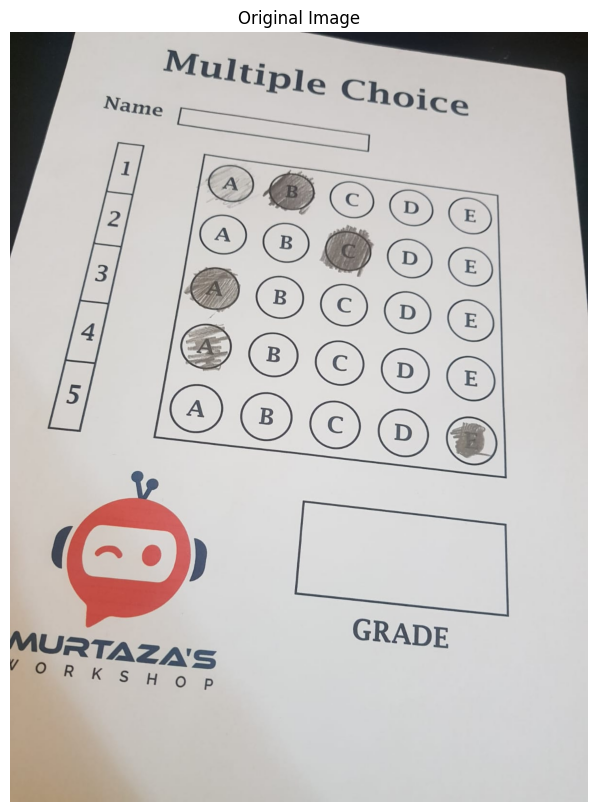

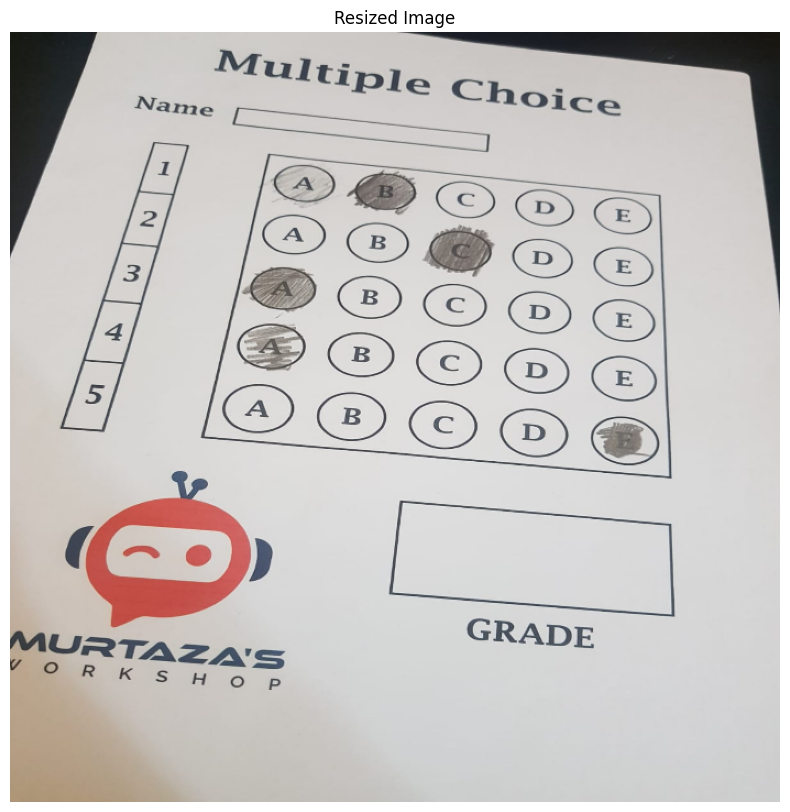

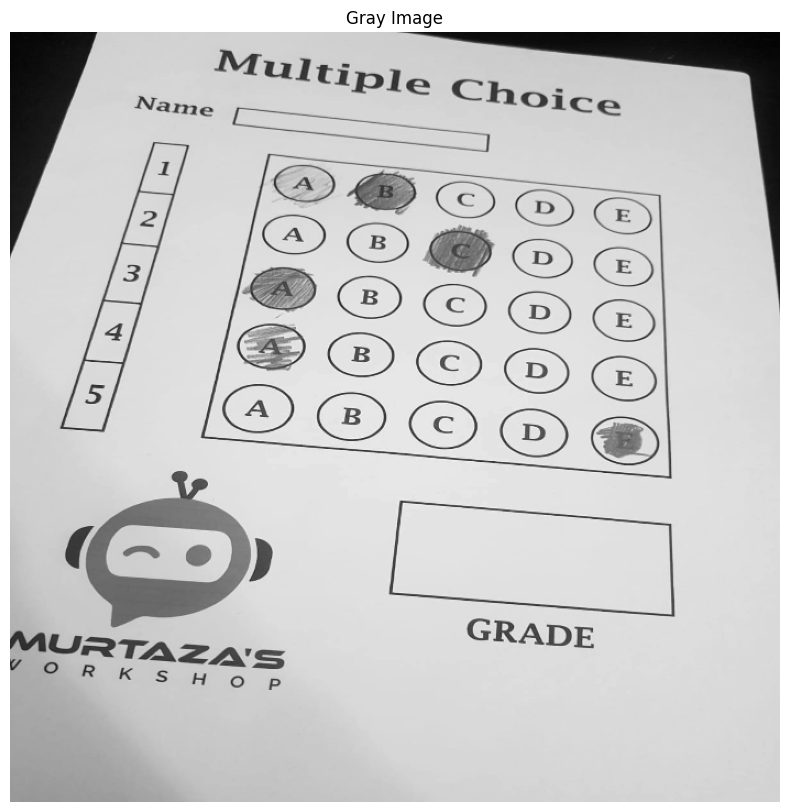

In [ ]:
path = "i1.jpg"
Image_Width = 700
Image_Height = 700

Original_Image = cv.imread(path)
Resized_Image = cv.resize(Original_Image, (Image_Width, Image_Height))
display_image("Original Image", cv.cvtColor(Original_Image, cv.COLOR_BGR2RGB))
display_image("Resized Image", cv.cvtColor(Resized_Image, cv.COLOR_BGR2RGB))

Gray_Image = cv.cvtColor(Resized_Image, cv.COLOR_BGR2GRAY)
display_image("Gray Image", Gray_Image, cmap='gray')

## Applying Gaussian Blur
We apply Gaussian Blur to the grayscale image to reduce noise and smoothen the image.

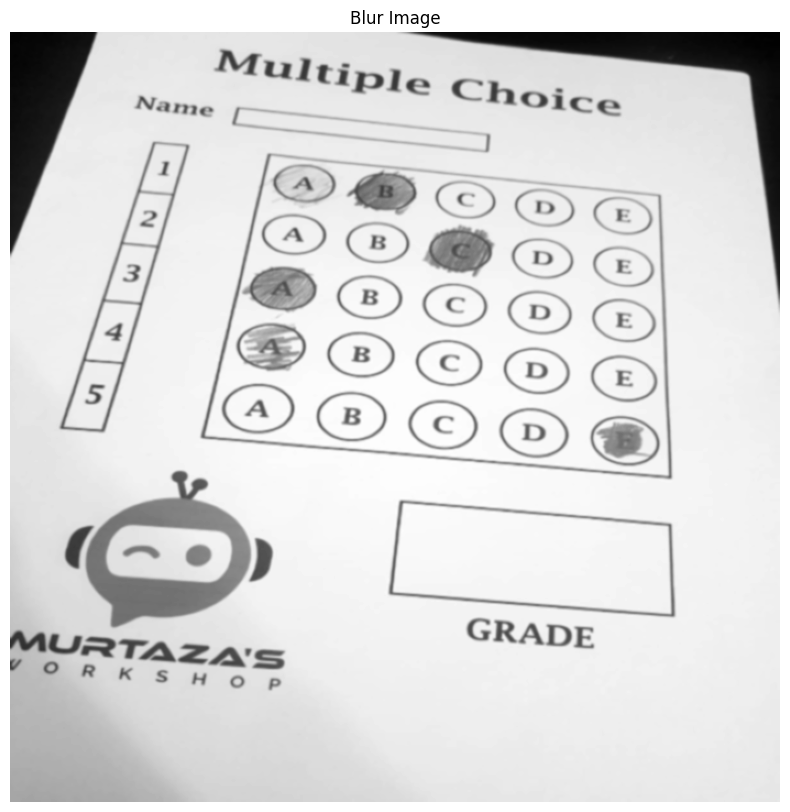

In [ ]:
Blur_Image = cv.GaussianBlur(Gray_Image, (5, 5), 1)
display_image("Blur Image", Blur_Image, cmap='gray')

## Applying Canny Edge Detection
We use the Canny algorithm to detect edges in the blurred image.

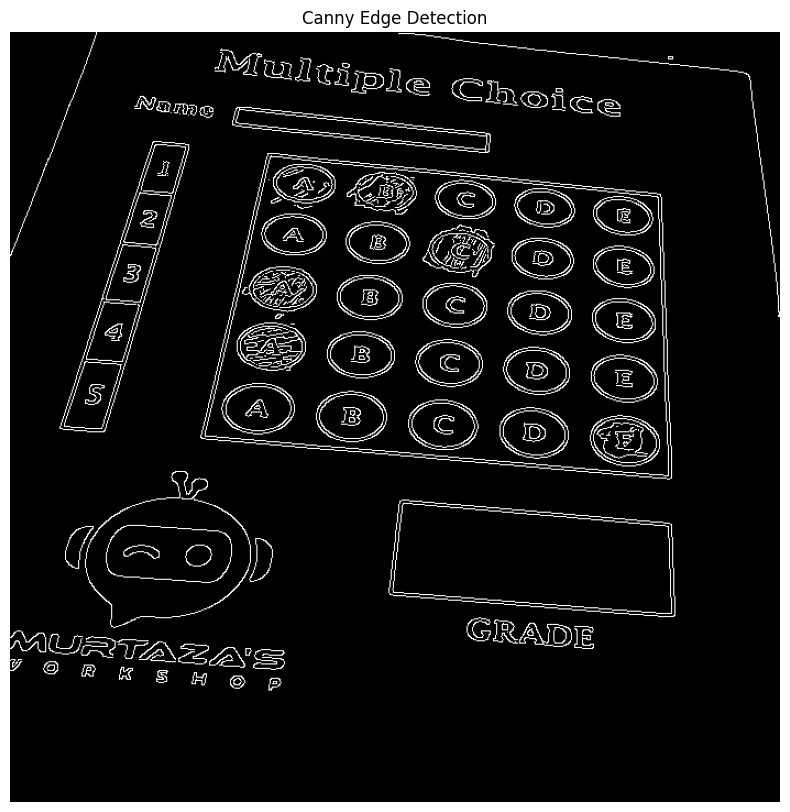

In [ ]:
Canny_Image = cv.Canny(Blur_Image, 10, 50)
display_image("Canny Edge Detection", Canny_Image, cmap='gray')

## Finding and Drawing Contours
We find contours in the edge-detected image and draw them for visualization.

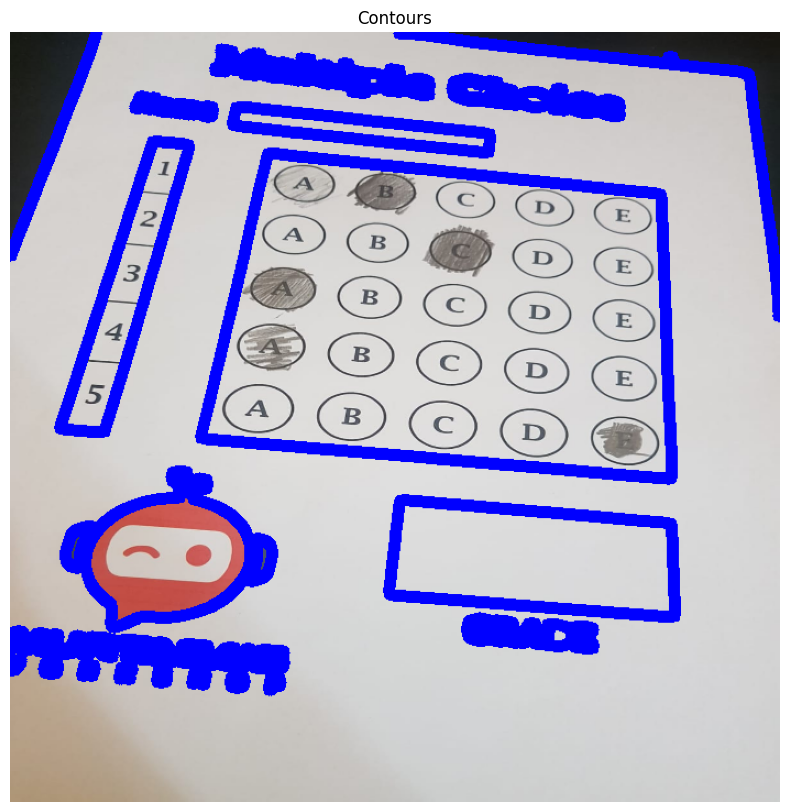

Total contours found: 71


In [ ]:
Contour_Image = Resized_Image.copy()
Contours, Hierarchy = cv.findContours(Canny_Image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(Contour_Image, Contours, -1, (255, 0, 0), 10)
display_image("Contours", cv.cvtColor(Contour_Image, cv.COLOR_BGR2RGB))

print(f"Total contours found: {len(Contours)}")

## Separating Rectangle Contours
We identify the rectangular contours from the detected contours.

In [ ]:
Rectangle_Contours = Separate_Rectangles_From_Image(Contours)
print(f"Rectangle contours found: {len(Rectangle_Contours)}")

maxAreaRect = getCornerPoints(Rectangle_Contours[0])
gradePointBox = getCornerPoints(Rectangle_Contours[1])
print(f"Max area rectangle corners: {maxAreaRect}")
print(f"Grade point box corners: {gradePointBox}")

Rectangle contours found: 3
Max area rectangle corners: [[[234 110]]

 [[174 369]]

 [[601 405]]

 [[591 147]]]
Grade point box corners: [[[354 426]]

 [[345 511]]

 [[604 530]]

 [[599 446]]]


## Perspective Transform for OMR and Grade Box
We transform the perspective to obtain a top-down view of the OMR and grade box.

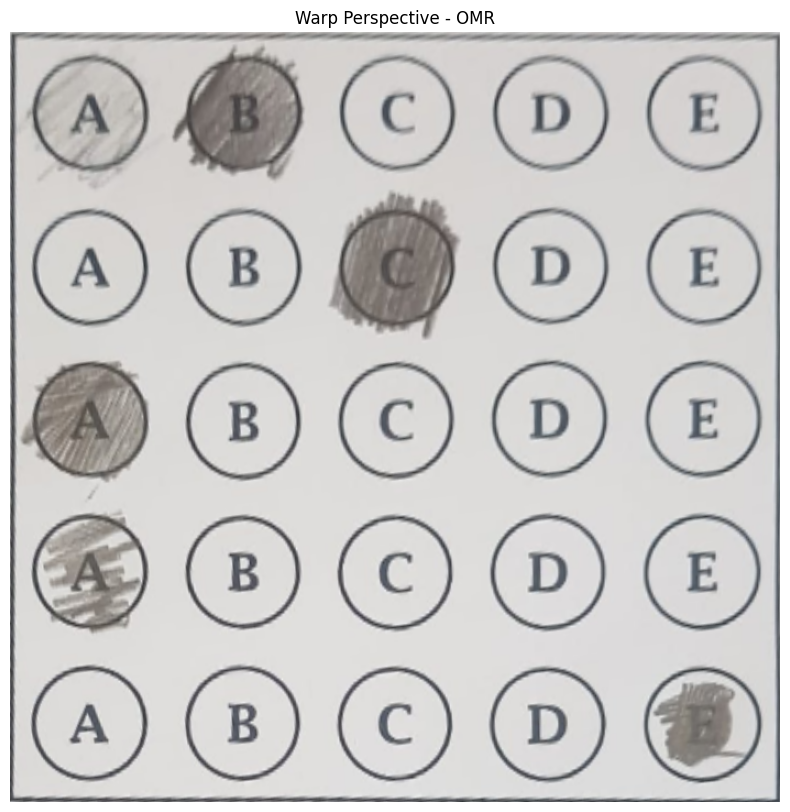

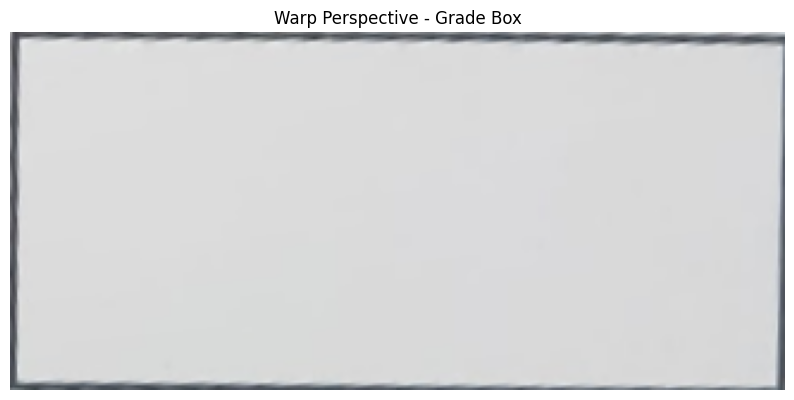

In [ ]:
if maxAreaRect.size != 0 and gradePointBox.size != 0:
    maxAreaRect = reorder(maxAreaRect)
    gradePointBox = reorder(gradePointBox)

    pt1_R = np.float32(maxAreaRect)
    pt2_R = np.float32([[0, 0], [Image_Width, 0], [0, Image_Height], [Image_Width, Image_Height]])
    Resulting_maxAreaRect = cv.getPerspectiveTransform(pt1_R, pt2_R)
    ColorWrap_maxAreaRect = cv.warpPerspective(Resized_Image, Resulting_maxAreaRect, (Image_Width, Image_Height))
    display_image("Warp Perspective - OMR", cv.cvtColor(ColorWrap_maxAreaRect, cv.COLOR_BGR2RGB))

    pt1_G = np.float32(gradePointBox)
    pt2_G = np.float32([[0, 0], [325, 0], [0, 150], [325, 150]])
    Resulting_gradePointBox = cv.getPerspectiveTransform(pt1_G, pt2_G)
    ColorWrap_gradePointBox = cv.warpPerspective(Resized_Image, Resulting_gradePointBox, (325, 150))
    display_image("Warp Perspective - Grade Box", cv.cvtColor(ColorWrap_gradePointBox, cv.COLOR_BGR2RGB))

## Thresholding and Bubble Detection
We apply thresholding to detect the marked bubbles in the OMR sheet.

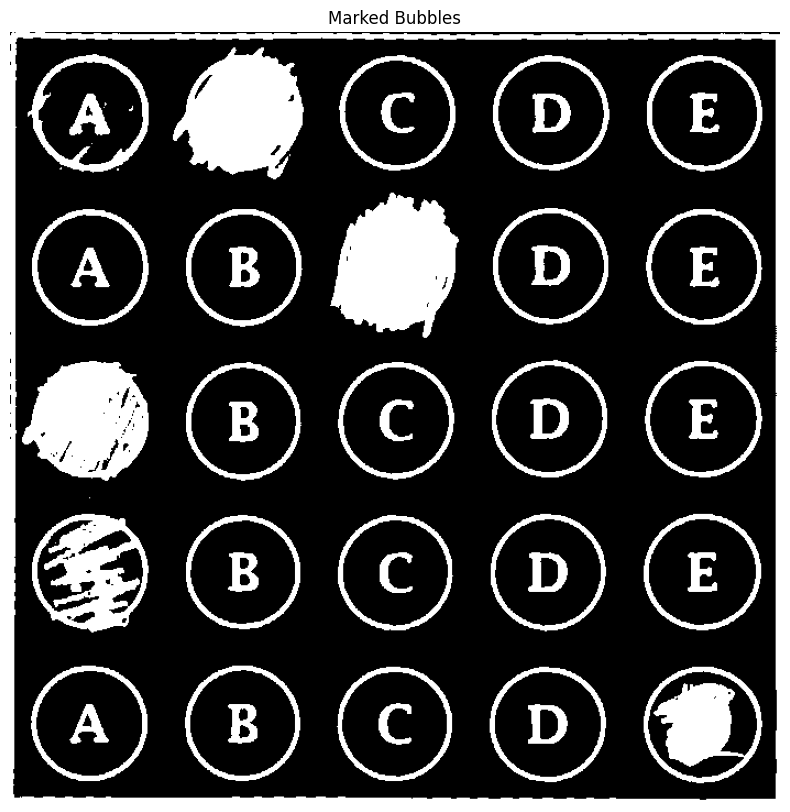

In [ ]:
Gray_maxAreaRec = cv.cvtColor(ColorWrap_maxAreaRect, cv.COLOR_BGR2GRAY)
MarkedBubbles = cv.threshold(Gray_maxAreaRec, 170, 255, cv.THRESH_BINARY_INV)[1]
display_image("Marked Bubbles", MarkedBubbles, cmap='gray')

## Splitting and Counting Bubbles
We split the marked bubble region into individual bubbles and count the number of non-zero pixels to determine marked answers.

In [ ]:
Total_MCQs = 5
Total_Options = 5

bubbleRegions = splitBoxes(MarkedBubbles, Total_MCQs, Total_Options)
Pixel_Of_Bubbles = np.zeros((Total_MCQs, Total_Options))
Qno, Optno = 0, 0
for bubble in bubbleRegions:
    Pixel_Of_Bubbles[Qno][Optno] = cv.countNonZero(bubble)
    Optno += 1
    if Optno == Total_Options:
        Optno = 0
        Qno += 1

print("Pixel count of bubbles:")
print(Pixel_Of_Bubbles)

Pixel count of bubbles:
[[ 4251. 10269.  2688.  2953.  3305.]
 [ 2876.  2302. 10670.  2249.  2624.]
 [ 9560.  2231.  2018.  2223.  2642.]
 [ 6422.  2167.  1947.  2199.  2676.]
 [ 3231.  2718.  2506.  2674.  6349.]]


## Comparing Answers and Calculating Grade
We compare the detected marked answers with the correct answers and calculate the grade.

In [ ]:
Correct_Answers = [1, 2, 1, 0, 4]
Result = []
Marked_Option_Indices = []

for i in range(0, Total_MCQs):
    Marked_Option_Indices.append(np.argmax(Pixel_Of_Bubbles[i]))

for i in range(0, Total_MCQs):
    if Marked_Option_Indices[i] == Correct_Answers[i]:
        Result.append(1)
    else:
        Result.append(0)

Grade = (sum(Result) / Total_MCQs) * 100

print("Correct Option Indices:")
print(Correct_Answers)
print("Marked Option Indices:")
print(Marked_Option_Indices)
print("Result:")
print(Result)
print(f"Grade: {Grade}%")

Correct Option Indices:
[1, 2, 1, 0, 4]
Marked Option Indices:
[1, 2, 0, 0, 4]
Result:
[1, 1, 0, 1, 1]
Grade: 80.0%


## Displaying the Final Marked Answers and Grade
We overlay the detected marked answers and grade onto the original image for visualization.

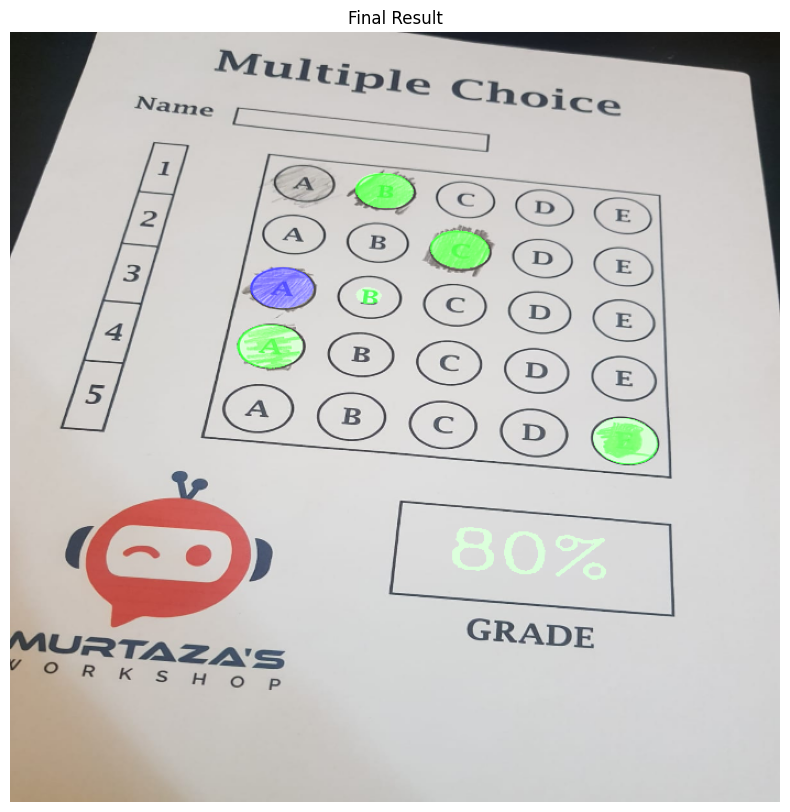

In [ ]:
Marked_Answers_Image = ColorWrap_maxAreaRect.copy()
showAnswers(Marked_Answers_Image, Marked_Option_Indices, Result, Correct_Answers, Total_MCQs, Total_Options)
OnlyBubbles = np.zeros_like(ColorWrap_maxAreaRect)
showAnswers(OnlyBubbles, Marked_Option_Indices, Result, Correct_Answers, Total_MCQs, Total_Options)
Resulting_inv_maxAreaRect = cv.getPerspectiveTransform(pt2_R, pt1_R)
ColorWrap_inv_maxAreaRect = cv.warpPerspective(OnlyBubbles, Resulting_inv_maxAreaRect, (Image_Width, Image_Height))

GradeImage = np.zeros_like(ColorWrap_gradePointBox)
cv.putText(GradeImage, str(int(Grade)) + "%", (60, 100), cv.FONT_HERSHEY_COMPLEX, 3, (0, 255, 0), 3)
Resulting_inv_gradePointBox = cv.getPerspectiveTransform(pt2_G, pt1_G)
ColorWrap_inv_gradePointBox = cv.warpPerspective(GradeImage, Resulting_inv_gradePointBox, (Image_Width, Image_Height))

Final_Image = cv.addWeighted(Resized_Image, 1, ColorWrap_inv_maxAreaRect, 1, 0)
Final_Image = cv.addWeighted(Final_Image, 1, ColorWrap_inv_gradePointBox, 1, 0)
display_image("Final Result", cv.cvtColor(Final_Image, cv.COLOR_BGR2RGB))

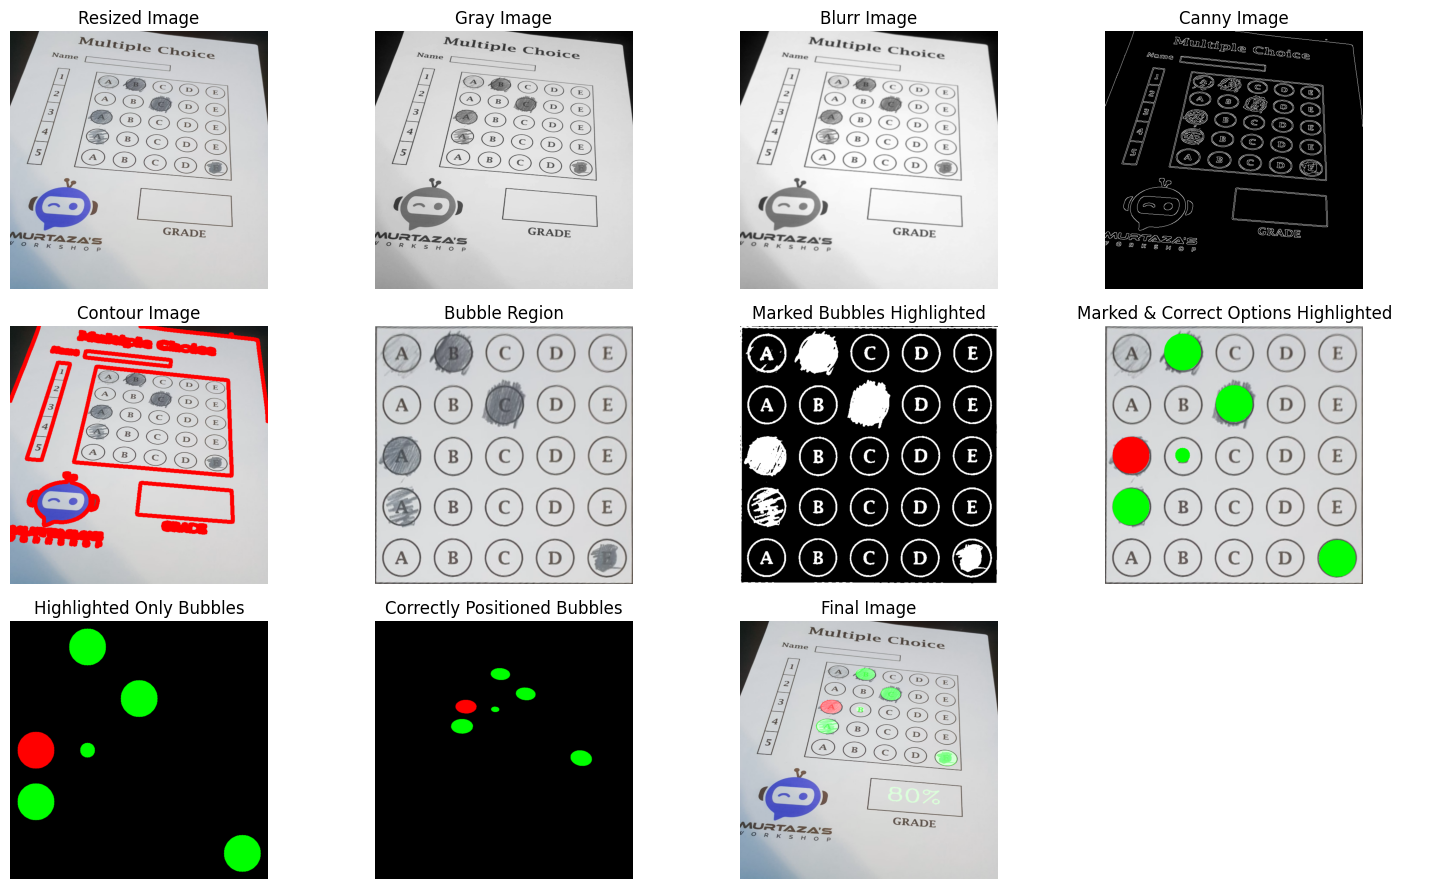

In [ ]:
    # Display the images
Image_Array = [Resized_Image, Gray_Image, Blur_Image, Canny_Image,
               Contour_Image, ColorWrap_maxAreaRect, MarkedBubbles,
               Marked_Answers_Image, OnlyBubbles, ColorWrap_inv_maxAreaRect, Final_Image]

labels = ["Resized Image", "Gray Image", "Blurr Image", "Canny Image",
          "Contour Image", "Bubble Region", "Marked Bubbles Highlighted", "Marked & Correct Options Highlighted", "Highlighted Only Bubbles", "Correctly Positioned Bubbles", "Final Image"]

display_all_images(Image_Array, labels)